In [93]:
# Keep import statement in their own cell at the top
import matplotlib.pyplot as plt # for plotting          
import numpy as np
import math
import LogisticMap as lm
# import our Pendulum class from Particle1D
from Particle1D_2 import Pendulum

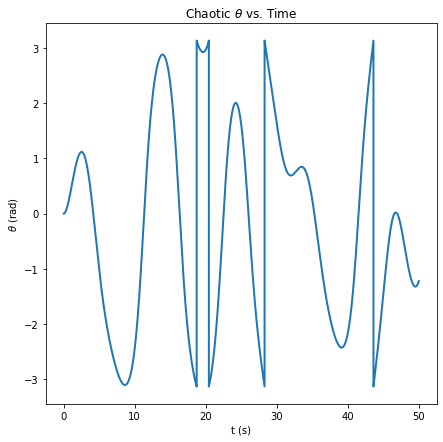

In [62]:
# Set up chaotic systems
N = 30
TF = 50

p1 = Pendulum(l = 9.8, nu = 0.5, Fd = 1.1, omega_d = 0.6, x0 = 0, tf = TF) 
p1.Verlet_trajectory()
fig = plt.figure(figsize = [7,7])
plt.xlabel('t (s)')
plt.ylabel('$\\theta$ (rad)')
plt.title('Chaotic $\\theta$ vs. Time')
plt.plot(p1.tarray, p1.x_verlet, lw = 2)

cd_av = np.zeros(int(TF/0.001))

for i in range(N):                 
    p1 = Pendulum(l = 9.8, nu = 0.5, Fd = 1.1, omega_d = 0.6, x0 = 0, tf = TF) # chaotic 1
    p2 = Pendulum(l = 9.8, nu = 0.5, Fd = 1.1, omega_d = 0.6, x0 = i*10**(-1-i*.3), tf = TF) # chaotic 2
    p1.Verlet_trajectory() 
    p2.Verlet_trajectory()
    chaotic_difference = abs(p1.x_verlet - p2.x_verlet)
    cd_av += chaotic_difference
    
cd_av = cd_av/N

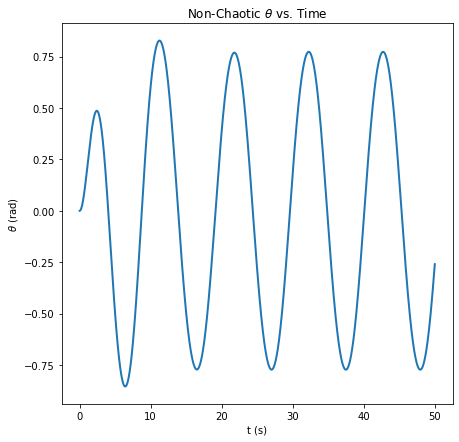

In [63]:
# Set up non-chaotic systems
p1 = Pendulum(l = 9.8, nu = 0.5, Fd = 0.5, omega_d = 0.6, x0 = 0, tf = TF) # non-chaotic 
p1.Verlet_trajectory() 
fig = plt.figure(figsize = [7,7])
plt.xlabel('t (s)')
plt.ylabel('$\\theta$ (rad)')
plt.title('Non-Chaotic $\\theta$ vs. Time')
plt.plot(p1.tarray, p1.x_verlet, lw = 2)

nd_av = np.zeros(int(TF/0.001))

for i in range(N):
    p3 = Pendulum(l = 9.8, nu = 1, Fd = 3, omega_d = 2, x0 = 0.00, tf = TF) # non-chaotic 1
    p4 = Pendulum(l = 9.8, nu = 1, Fd = 3, omega_d = 2, x0 = i*10**(-1-i*.3), tf = TF) # non-chaotic 2
    p3.Verlet_trajectory() 
    p4.Verlet_trajectory()
    non_chaotic_difference = abs(p3.x_verlet - p4.x_verlet)
    nd_av += non_chaotic_difference
    
nd_av = nd_av/N

Problem 1

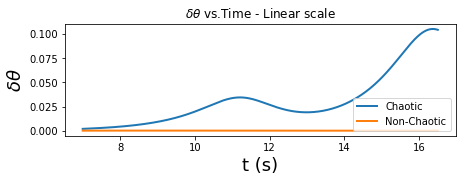

In [64]:
# Plot Average Difference vs. Time
start = int(7/0.001) # exponential difference starts at 7.5 sec
end = int(16.5/0.001) # ends around 16.5 sec
fig = plt.figure(figsize = [7,7])
ax1 = fig.add_subplot(311)
ax1.plot(p2.tarray[start:end], cd_av[start:end], lw = 2, label = "Chaotic")
ax1.plot(p2.tarray[start:end], nd_av[start:end], lw = 2, label = "Non-Chaotic")
#ax1.set_yscale('log')
    
ax1.set_xlabel('t (s)',fontsize = 18)
ax1.set_ylabel('$\\delta \\theta$', fontsize = 18)
ax1.legend(loc = 4)
plt.title('$\\delta \\theta$ vs.Time - Linear scale')
plt.show()

In [65]:
# Calculate Lypunov Exponent
m, b = np.polyfit(p2.tarray[start: end], np.log(np.pi*cd_av[start: end]), 1)
print('Lyapunov exponent estimate:', m) 

Lyapunov exponent estimate: 0.32876837383562774


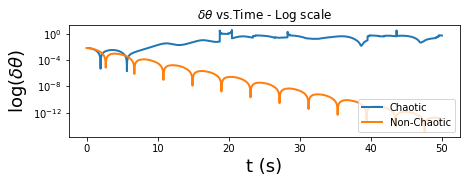

In [66]:
fig = plt.figure(figsize = [7,7])
ax1 = fig.add_subplot(311)
ax1.plot(p2.tarray, cd_av, lw = 2, label = "Chaotic")
ax1.plot(p2.tarray, nd_av, lw = 2, label = "Non-Chaotic")
ax1.set_yscale('log')

ax1.set_xlabel('t (s)',fontsize = 18)
ax1.set_ylabel('log($\\delta \\theta$)', fontsize = 18)
plt.title('$\\delta \\theta$ vs.Time - Log scale')
ax1.legend(loc = 4)
plt.show()

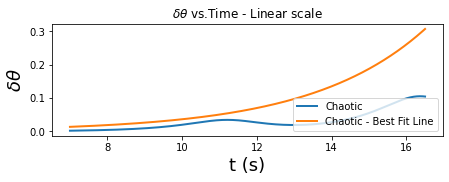

In [67]:
# Find range in graph to fit to exp(lambda*t)
fig = plt.figure(figsize = [7,7])
ax1 = fig.add_subplot(311)
bf = np.zeros(end-start)
for i in range(end-start):
    bf[i] = (math.e**(b))*(math.e**(m*p2.tarray[start+i]))
ax1.plot(p2.tarray[start:end], cd_av[start:end], lw = 2, label = "Chaotic")
ax1.plot(p2.tarray[start:end], bf, lw = 2, label = "Chaotic - Best Fit Line")
    
ax1.set_xlabel('t (s)',fontsize = 18)
ax1.set_ylabel('$\\delta \\theta$', fontsize = 18)
ax1.legend(loc = 4)
plt.title('$\\delta \\theta$ vs.Time - Linear scale')
plt.show()

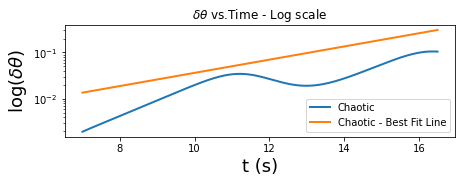

In [68]:
# Same graph as above but Log scale
fig = plt.figure(figsize = [7,7])
ax1 = fig.add_subplot(311)
bf = np.zeros(end-start)
for i in range(end-start):
    bf[i] = (math.e**(b))*(math.e**(m*p2.tarray[start+i]))
ax1.plot(p2.tarray[start:end], cd_av[start:end], lw = 2, label = "Chaotic")
ax1.plot(p2.tarray[start:end], bf, lw = 2, label = "Chaotic - Best Fit Line")
ax1.set_yscale('log')
    
ax1.set_xlabel('t (s)',fontsize = 18)
ax1.set_ylabel('log($\\delta \\theta$)', fontsize = 18)
ax1.legend(loc = 4)
plt.title('$\\delta \\theta$ vs.Time - Log scale')
plt.show()

Lyapunov exponent estimate is confirmed to be 0.3863504962601241 and the system is chaotic. Lyapunov found by fitting exponential best fit line on exponential part of Chaotic graph and taking the exponent's constant. 

Problem 2

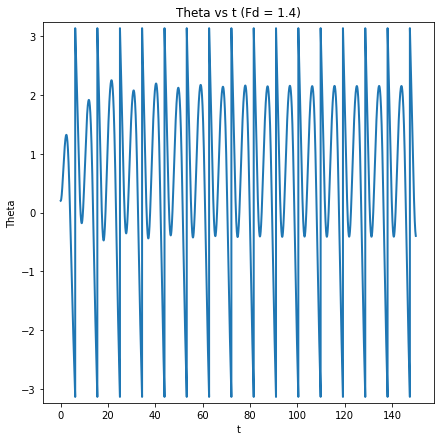

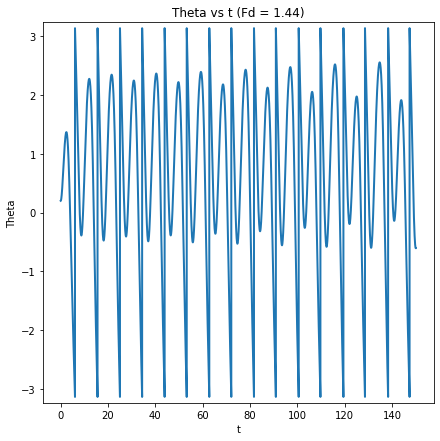

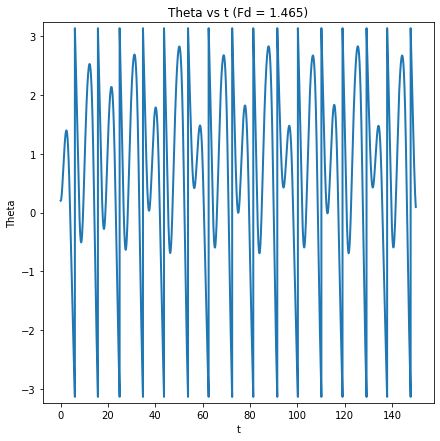

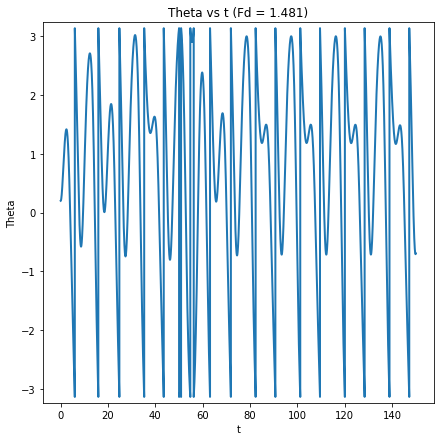

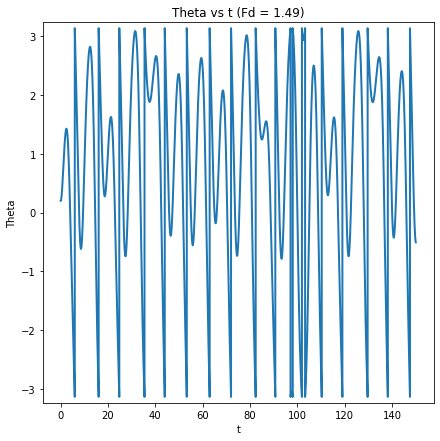

In [147]:
Fd1 = 1.4
Fd2 = 1.44
Fd3 = 1.465
Fd4 = 1.481
Fd5 = 1.49

# First Plot all theta vs. t graphs
def grapher(drive_F):
    dt = 0.001
    start_time = 0
    start_index = int(0/dt)
    p99 = Pendulum(l = 9.8, nu = 0.5, Fd = drive_F, omega_d = 2/3, x0 = 0.2, tf = 150) 
    p99.Verlet_trajectory()
    xx = p99.x_verlet[start_index:]
    fig = plt.figure(figsize = [7,7])
    plt.xlabel('t')
    plt.ylabel('Theta')
    plt.title('Theta vs t (Fd = {})'.format(drive_F))
    plt.plot(p99.tarray, xx, lw = 2)
    plt.ylim([-math.pi-0.1,math.pi+0.1])

grapher(Fd1)
grapher(Fd2)
grapher(Fd3)
grapher(Fd4)
grapher(Fd5)

Transient ends at approx 50 seconds

13236386 13236386.100475963


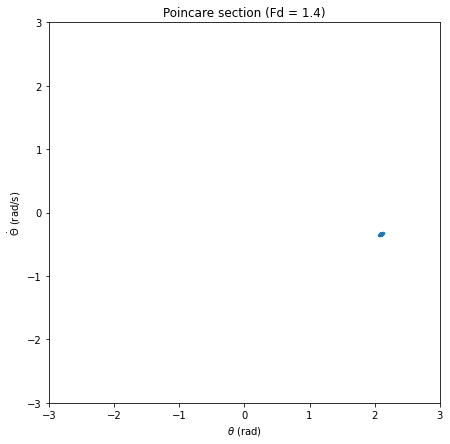

In [142]:
TF = 25000
# Function to compute theta_dot and theta pairings
def Poincare(drive_F):
    
    omega = 2/3
    dt1 = (2*math.pi/omega)/5000
    
    start_time = 50
    start_index = int(start_time/dt1)
    
    p99 = Pendulum(l = 9.8, nu = 0.5, Fd = drive_F, omega_d = omega, x0 = 0.2, tf = TF, dt = dt1) 
    p99.scipy_trajectory()
    p99.Euler_trajectory()
    xx = p99.xv[:,0][start_index:] # start at t sec 
    vv = p99.xv[:,1][start_index:]
    print(len(vv), (TF-start_time)/dt1)
    period = (2*math.pi/omega)/dt1 # index of period
    revs = int(len(xx)/period)
    n = len(p99.tarray[start_index:])
    
    tt = []
    td = []
    for c in range(revs):
        ind = int(c*period)
        # t_dif = abs(p99.tarray[ind] - 2*math.pi/(2/3))        
        tt = tt + [xx[ind]]
        td = td + [vv[ind]]
    return tt, td

tt1, td1 = Poincare(Fd1)
fig = plt.figure(figsize = [7,7])
plt.xlabel('$\\theta$ (rad)')
plt.ylabel('$\dot{\Theta}$ (rad/s)')
plt.title('Poincare section (Fd = {})'.format(Fd1))
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.plot(tt1, td1, '.', markersize = 5)

13236386 13236386.100475963


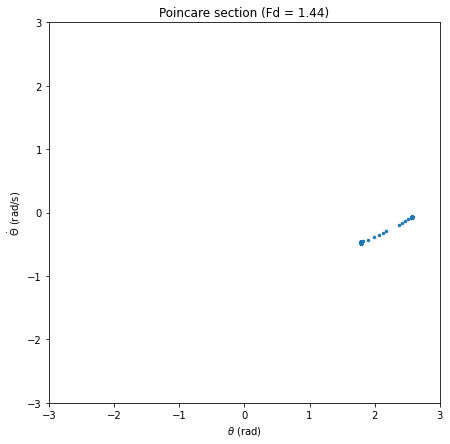

In [143]:
tt2, td2 = Poincare(Fd2)
fig = plt.figure(figsize = [7,7])
plt.xlabel('$\\theta$ (rad)')
plt.ylabel('$\dot{\Theta}$ (rad/s)')
plt.title('Poincare section (Fd = {})'.format(Fd2))
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.plot(tt2, td2, '.', markersize = 5)

13236386 13236386.100475963


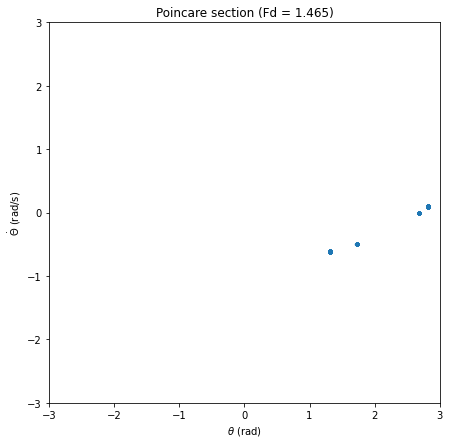

In [144]:
tt3, td3 = Poincare(Fd3)
fig = plt.figure(figsize = [7,7])
plt.xlabel('$\\theta$ (rad)')
plt.ylabel('$\dot{\Theta}$ (rad/s)')
plt.title('Poincare section (Fd = {})'.format(Fd3))
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.plot(tt3, td3, '.', markersize = 5)

13236386 13236386.100475963


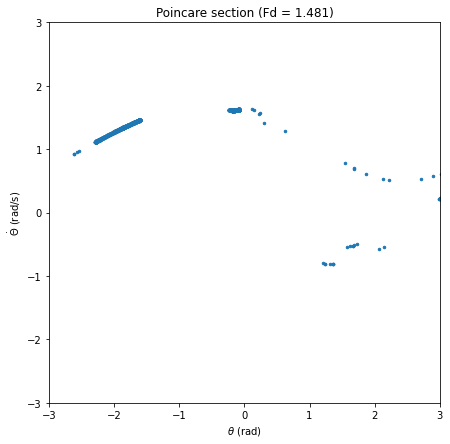

In [145]:
tt4, td4 = Poincare(Fd4)
fig = plt.figure(figsize = [7,7])
plt.xlabel('$\\theta$ (rad)')
plt.ylabel('$\dot{\Theta}$ (rad/s)')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.title('Poincare section (Fd = {})'.format(Fd4))
plt.plot(tt4, td4, '.', markersize = 5)

13236386 13236386.100475963


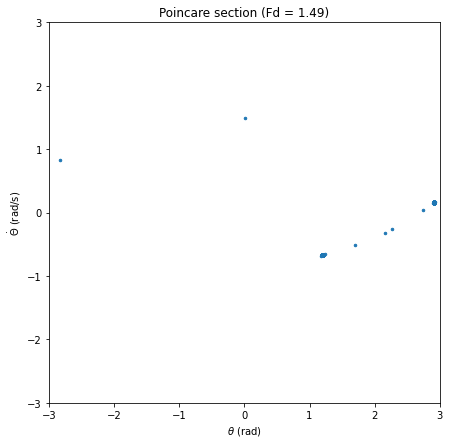

In [146]:
tt5, td5 = Poincare(Fd5)
fig = plt.figure(figsize = [7,7])
plt.xlabel('$\\theta$ (rad)')
plt.ylabel('$\dot{\Theta}$ (rad/s)')
plt.title('Poincare section (Fd = {})'.format(Fd5))
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.plot(tt5, td5, '.', markersize = 5)

The five graphs above are Poincare sections for Fd = 1.4, 1.44, 1.465, 1.481, and 1.49 with a driving frequency of 2/3 and l=g=9.8. Based on the first 5 graphs of this problem, I concluded that the transient ranged from t = [0, 50] and removed those points from the data I used for my Poincare sections. I graphed approximately 13 million periods of the non-transient solution. 
The attractor in the period-1 regime only contains a single point, as anticipated. For Fd = 1.465, the graph contains 4 fixed points, signaling to us that the behavior is period 4. For Fd = 1.481, there are 8 distinct points on its Poincare section so this system is period 8. Likewise, Fd = 1.44 is period 11 due to the 11 distinct points on its Poincare section. 
The Poincare section of Fd = 1.49 seems to signal to us that this set of parameters is creates a chaotic system due to the continuous nature of its solution. If this simulation were to run until t = infinity, this graph would be a continuous graph will each point connected to another versus being all spread out like the rest of the non-chaotic systems. This chaotic system has not a reoccuring pattern. 

Problem 3

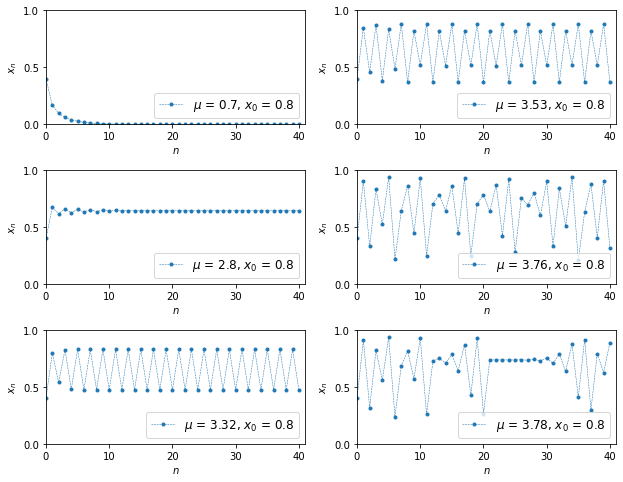

In [111]:
# Show evolution into chaotic system
fig = plt.figure(figsize = [9,7])
axs = fig.subplots(3,2)
    
axs = list(axs.flatten())
mus = [0.7,3.53,2.8,3.76,3.32,3.78] 

max_steps = 40

for ii in range(6):

    m = lm.LogisticMap(0.4, mu = mus[ii])
    m.iterate(max_steps)

    axs[ii].plot(m.xList, ls = '--', marker = 'o', ms = 3, lw =0.5, label = "$\mu$ = {0}, $x_0$ = {1}".format(mus[ii], 0.8))
    axs[ii].set_ylabel('$x_n$')
    axs[ii].set_xlabel('$n$')
    axs[ii].legend(loc = 4,fontsize = 12)
    axs[ii].set_ylim([0,1])
    axs[ii].set_xlim([0,max_steps+1])
    axs[ii].set_yticks([0,0.5,1])
        
    
    fig.subplots_adjust(top = 0.95, bottom =0.09, left = 0.10, right =0.98, wspace = 0.2, hspace = 0.4)

In [258]:
# Generate a bifrucation diagram
mu_start = 0.01
mu_stop = 3.8
mu_steps = 2000

x0 = 0.8 

# Generate an array of mu values
mus = np.linspace(mu_start, mu_stop, mu_steps)

# containers for mu values and logistic map values
mu_list = []
m_list = []
mu_critical = [0.0] # list of mu that diverge into 2 streams
    

epsilon_n = 2 # error on nth step
prev_num_points = 0

# loop over the mu values
for mu in mus:
    
    # generate a time trace for the logistic map at a given mu
    m = lm.LogisticMap(x0, mu = mu)
    
    # initialize method removes transient
    m.initialize(100)
    m.iterate(1000)
        
    # convert list to numpy array object
    m_points = np.array(m.xList)
    # round points for speedier computation
    m_points = np.round(m_points, 5)
    
    #!!!!!ADD YOUR CODE HERE to select key points from time trace here 
    
    fixed_points = np.unique(m_points) # unique points are fixed points
    num_points = len(fixed_points)
    
    # Find critical values of mu, where doubling occurs
    if (num_points > 0):
        dif = abs(mu_critical[-1] - mu) # mu step since last critical value
        epsilon = dif/mu 
        r = epsilon_n/epsilon # ratio of errors around fixed point

        if 1.01 < r and r < 3.0: # unstable
            mu_critical = mu_critical + [mu] 
            epsilon_n = epsilon
            prev_num_points = num_points

        for i in range(num_points):
            m_list = m_list + [fixed_points[i]]
            mu_list = mu_list + [mu]

Text(0.5, 1.0, 'Bifrucation Diagram')

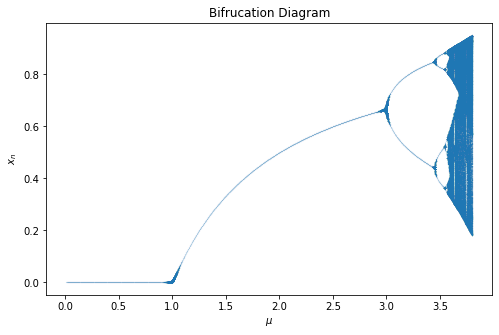

In [259]:
fig = plt.figure(figsize = [8,5])
ax = fig.add_subplot(111)
ax.plot(mu_list, m_list,'.', markersize = .1)
ax.set_xlabel('$\mu$')
ax.set_ylabel('$x_n$')
plt.title('Bifrucation Diagram')

Text(0.5, 1.0, 'Zoomed-In Bifrucation Diagram 1')

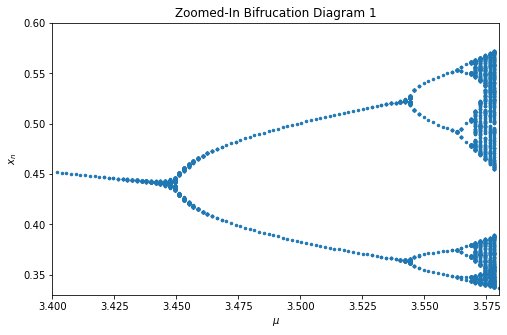

In [260]:
fig = plt.figure(figsize = [8,5])
ax = fig.add_subplot(111)
ax.plot(mu_list, m_list,'.', markersize = 5)
ax.set_xlabel('$\mu$')
ax.set_ylabel('$x_n$')
plt.xlim([3.4,3.58])
plt.ylim([.33,.6])
plt.title('Zoomed-In Bifrucation Diagram 1')

Text(0.5, 1.0, 'Zoomed-In Bifrucation Diagram 2')

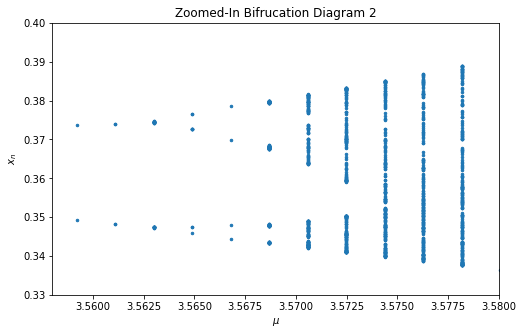

In [261]:
fig = plt.figure(figsize = [8,5])
ax = fig.add_subplot(111)
ax.plot(mu_list, m_list,'.', markersize = 5)
ax.set_xlabel('$\mu$')
ax.set_ylabel('$x_n$')
plt.xlim([3.558,3.58])
plt.ylim([.33,.4])
plt.title('Zoomed-In Bifrucation Diagram 2')

Text(0.5, 1.0, 'Zoomed-In Bifrucation Diagram 3')

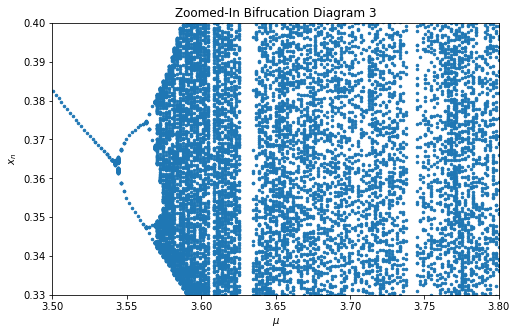

In [262]:
fig = plt.figure(figsize = [8,5])
ax = fig.add_subplot(111)
ax.plot(mu_list, m_list,'.', markersize = 5)
ax.set_xlabel('$\mu$')
ax.set_ylabel('$x_n$')
plt.xlim([3.5,3.8])
plt.ylim([.33,.4])

#plt.xlim([3.78,3.8])
plt.title('Zoomed-In Bifrucation Diagram 3')

In [264]:
# Calculate Feigenbaum parameter
smallest_dif = 100
best_feig = 0
best_ind = 0
k_limit = len(mu_critical) - 2

for k in range(k_limit):
    num=k+1
    feig = (mu_critical[num] - mu_critical[num-1])/(mu_critical[num+1] - mu_critical[num])
    test = abs(feig-4.669)
    if test < smallest_dif:
        smallest_dif = test
        best_feig = feig
        best_ind = num

print('Feig =', best_feig, 'at index =', best_ind)

Feig = 2.0 at index = 3


My attempt at solving for the Feigenbaum parameter prooved unsuccessful using my computer however I was able to solve it graphically. I zoomed in on Bifurcation diagram (as shown in the figures above) to find the mu values that resulted in period doubling. I centered around the mu value mu = 3.543, the fourth mu where period doubling occurs, and calculated the Feigenbaum parameter to be 4.591 (n+1 value = 3.565, n-1 value = 3.442). 

In [265]:
percent_error = round(abs(100*(4.591-4.669)/4.669), 3)
print('Percent error is calculated to be', percent_error, '%')

Percent error is calculated to be 1.671 %


Judging from my percent error or 1.671%, my method of deriving the Feigenbaum parameter works and is somewhat precise. This precision can be improved by using larger consequent period doubling mu values. I did not do this because the graph becomes hard to read at larger mu values (as seen in the graphs above) but if I had gotten my Feigenbaum parameter deriving program to work I would have been able to use higher mu values. It does seem that my program reached its limit because as I zoom in further and further into the graph, it becomes impossible to read, almost like noise. This is likely due to numerical errors caused by the fact that I rounded the m_points to only 3 decimals.